In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
olist_customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-murzakova/anastasia_murzakova_27.02_a-murzakova_variant1/olist_customers_dataset.csv')

In [3]:
olist_customers_dataset.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
olist_customers_dataset.isna().info() # Проверим, есть ли ячейки без данных (1 вариант), таких ячеек нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   customer_id               99441 non-null  bool 
 1   customer_unique_id        99441 non-null  bool 
 2   customer_zip_code_prefix  99441 non-null  bool 
 3   customer_city             99441 non-null  bool 
 4   customer_state            99441 non-null  bool 
dtypes: bool(5)
memory usage: 485.7 KB


In [5]:
olist_orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-murzakova/anastasia_murzakova_27.02_a-murzakova_variant1/olist_orders_dataset.csv')

In [6]:
olist_orders_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [7]:
olist_customers_dataset.isna().count() # Проверим, есть ли ячейки без данных (2 вариант), таких ячеек нет.

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

In [8]:
olist_order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-murzakova/anastasia_murzakova_27.02_a-murzakova_variant1/olist_order_items_dataset.csv')

In [9]:
olist_order_items_dataset.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [10]:
olist_order_items_dataset.isna().count() # Проверим, есть ли ячейки без данных (2 вариант), таких ячеек нет.

order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64

In [11]:
# ЗАДАНИЕ 1. Сколько у нас пользователей, которые совершили покупку только один раз?

# Для того, чтобы посчитать пользователей, необходимо объединить две таблицы olist_customers_dataset и olist_orders_dataset,
# так как в первой хранится информация об уникальных id пользователей (customer_unique_id). На один customer_unique_id может
# приходиться несколько customer_id (совершается несколько покупок).

In [12]:
olist_customers_dataset \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'customer_id':'count'}) \
    .sort_values('customer_id', ascending = False)

,customer_unique_id,customer_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


In [13]:
olist_customers_dataset.query("customer_unique_id == '6469f99c1f9dfae7733b25662e7f1782'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
16876,65a75a3c78a824c9df00b338e265023a,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP
17597,7e4a91675986931608b18f4ade346efb,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP
26671,1f214d9540752e0a04a499a0f30ab877,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP
30247,91bd4ed51ee3835599963b967d9b9bbc,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP
51185,4478700ff008d3fffa02e95d89b9795f,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP
62079,a6a4a92ed2dfb40d31282925d93feebd,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP
87698,3f3c7b01b38222e1e68d3f03df8cd439,6469f99c1f9dfae7733b25662e7f1782,11065,santos,SP


In [14]:
# Мы убедились в том, что customer_unique_id может включать в себя несколько customer_id.
# Объединять таблицы будем через INNER JOIN по столбцу customer_id, проверим количество строк в новом датафрейме после объединения.

In [15]:
olist_customers_dataset.shape

(99441, 5)

In [16]:
olist_orders_dataset.shape

(99441, 8)

In [17]:
customers_orders = olist_orders_dataset.merge(olist_customers_dataset, on = 'customer_id')

In [18]:
customers_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [19]:
customers_orders.shape

(99441, 12)

In [20]:
# Количество строк сохранилось, количество столбцов увеличилось после объединения.
# Для того, чтобы посчитать пользователей, которые совершили покупку, важно определить, какое действие/статус будем считать за
# совершенную покупку. За совершенную покупку будем считать статус доставки "delivered". 

# С финансовой точки зрания многие компании считают покупку совершенной в момент оформления отгрузочных документов (УПД), 
# по документам товар считается отгруженным. Перед нами стоит задача посчитать пользователей, совершивших покупку, поэтому будем
# считать покупку совершенной в момент физической доставки пользователю, когда клиент фактически получает заказ.

In [21]:
customers_orders.query("order_status == 'delivered'") \
                .groupby('customer_unique_id', as_index=False) \
                .agg({'order_id':'count'}) \
                .query('order_id == 1') \
                .count()

customer_unique_id    90557
order_id              90557
dtype: int64

In [22]:
# ОТВЕТ на ЗАДАНИЕ 1: 90557 пользователей, которые совершили покупку только один раз.

In [23]:
# ЗАДАНИЕ 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

# Для выполнения данного задания определим, по какой дате будем вычислять недоставленные заказы. Будем считать по времени
# оформляния заказа (order_purchase_timestamp) и рассмотрим все статусы, кроме "delivered" (доставлен).

In [24]:
olist_orders_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [25]:
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

In [26]:
olist_orders_dataset.dtypes # Преобразуем тип данных для "order_purchase_timestamp" во временной и проверим, произошли ли изменения.

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [27]:
# Так как нам необходимо посчитать среднее значение в месяц, давайте рассмотрим, сколько заказов не были доставлены по каждому
# месяцу в исследуемом периоде. Для этого создадим новую колонку "month_year", где преобразуем даты в начало каждого месяца.

In [28]:
olist_orders_dataset['month_year'] = olist_orders_dataset['order_purchase_timestamp'].astype('datetime64[M]')

In [29]:
olist_orders_dataset.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-01


In [30]:
orders_by_month = olist_orders_dataset.query("order_status != 'delivered'") \
                    .groupby('month_year', as_index=False) \
                    .agg({'order_id':'count'}) \
                    .rename(columns={'order_id':'orders_quantity'})

In [31]:
orders_by_month.head(10) # Новый датафрейм, где посчитано количество заказов по месяцам.

,month_year,orders_quantity
0,2016-09-01,3
1,2016-10-01,59
2,2017-01-01,50
3,2017-02-01,127
4,2017-03-01,136
5,2017-04-01,101
6,2017-05-01,154
7,2017-06-01,110
8,2017-07-01,154
9,2017-08-01,138


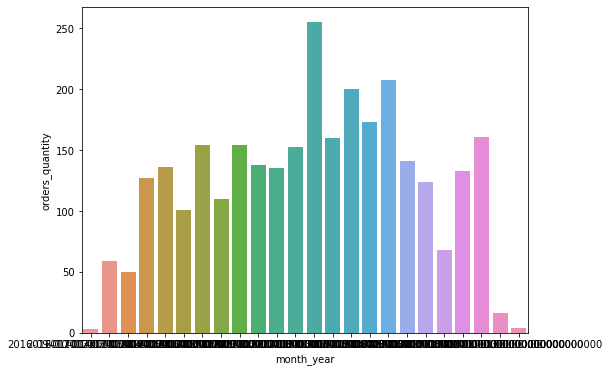

In [32]:
plt.figure(figsize = (8, 6))
sns.barplot(data=orders_by_month, x="month_year", y="orders_quantity") # Визуализируем датафрейм для наглядности

In [33]:
orders_by_month.orders_quantity.mean().round() # Округленное до целого среднее значение недоставленных заказов в месяц 

123.0

In [34]:
orders_by_month.orders_quantity.describe() # Другой метод вывести описательную статистику

count     24.000000
mean     123.458333
std       63.519924
min        3.000000
25%       92.750000
50%      135.500000
75%      155.500000
max      255.000000
Name: orders_quantity, dtype: float64

In [35]:
# Добавим для анализа статусы заказов, чтобы рассмотреть причины, по которым не доставляются заказы.

In [36]:
orders_by_month_status = olist_orders_dataset.query("order_status != 'delivered'") \
                        .groupby(['month_year', 'order_status'], as_index=False) \
                        .agg({'order_id':'count'}) \
                        .rename(columns={'order_id':'orders_quantity'})

In [37]:
orders_by_month_status # Датафрейм, сгруппированный по месяцам и статусам заказов

,month_year,order_status,orders_quantity
0,2016-09-01,canceled,2
1,2016-09-01,shipped,1
2,2016-10-01,canceled,24
3,2016-10-01,invoiced,18
4,2016-10-01,processing,2
...,...,...,...
108,2018-08-01,shipped,47
109,2018-08-01,unavailable,7
110,2018-09-01,canceled,15
111,2018-09-01,shipped,1


In [38]:
# Давайте более детально рассмотрим среднее количество недоставленных заказов по каждому статусу и сделам предположения о причинах
# недопоставки.

In [39]:
orders_status_mean = orders_by_month_status.groupby('order_status', as_index=False) \
                                                    .agg({'orders_quantity':'mean'}) \
                                                    .round() \
                                                    .rename(columns={'orders_quantity':'mean_orders_quantity'}) \
                                                    .sort_values('mean_orders_quantity', ascending = False)

In [40]:
orders_status_mean # Детализация недоставленных заказов по статусу

,order_status,mean_orders_quantity
5,shipped,48.0
6,unavailable,29.0
1,canceled,26.0
4,processing,16.0
3,invoiced,15.0
2,created,2.0
0,approved,1.0


In [41]:
# Рассмотрим причины недоставленных заказов на графике.

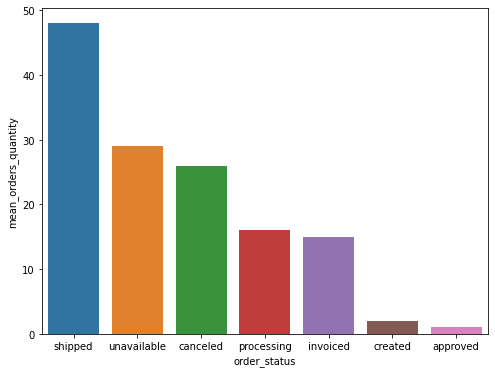

In [42]:
plt.figure(figsize = (8, 6))
sns.barplot(x='order_status', y='mean_orders_quantity', data=orders_status_mean)

In [43]:
# ОТВЕТ на ЗАДАНИЕ 2: в среднем каждый месяц за период с сентября 2016 года по октябрь 2018 года не доставляется 123 заказа.

# shipped (отгружен со склада) - товар находится в пути к клиенту, на момент сбора данных не был доставлен;
# unavailable (недоступен) - предполагаю, что товара нет на складе или артикул не заведен в систему (нет цены), чтобы оформить заказ;
# canceled (отменен) - заказ отменен по какой-либо причине;
# processing (в процессе сборки заказа) - товар находится в процессе сборки на складе;
# invoiced (выставлен счёт) - товар еще не начали собирать на складе или заказ ждет оплаты для начала подбора, если клиент приобретает по предоплате;
# created (создан) - заказ оформлен, на момент сбора данных еще не перешел к следующим стадиям работы с заказом;
# approved (подтвержден) - заказ подтвержден, на момент сбора данных еще не перешел к следующим стадиям работы с заказом.

# Из результатов видно, что большее количество заказов в среднем на момент сбора даннных не было доставлено по трем причинам,
# предлагаю сфокусироваться на недоступных (почему товар недоступен? заказан ли он на склад? нет ли нарушений в цепочке поставок?)
# и на отмененных (почему заказы были отменены? возможно, доставлены с браком или некорректно? не превышает ли срок поставки обещанный срок?),
# можно провести VOC (Voice of customer), чтобы собрать обратную связь у покупателей о причинах отмены.

# Заказы с остальными статусами с большой вероятностью будут доставлены, это этапы, которые проходит каждный заказ от момента 
# создания до физического получения, если товар доступен и заказ не отменен покупателем.

In [44]:
# ЗАДАНИЕ 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

# Объединим два датафрейма и создадим новую колонку "order_purchase_day", где выведем день недели, когда был оформлен заказ.
# В данной задаче мы не будем исключать отмененные и недоступные заказы, посмотрим на динамику оформления заказов в целом.

In [45]:
olist_orders_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-01


In [46]:
olist_orders_dataset.shape

(99441, 9)

In [47]:
olist_order_items_dataset.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [48]:
olist_order_items_dataset.shape

(112650, 7)

In [49]:
orders_by_products = olist_order_items_dataset.merge(olist_orders_dataset, on = 'order_id')

In [50]:
orders_by_products.shape

(112650, 15)

In [51]:
orders_by_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-01
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04-01
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-01


In [52]:
orders_by_products['order_purchase_timestamp'] = orders_by_products['order_purchase_timestamp'].astype('datetime64[D]')

In [53]:
orders_by_products['order_purchase_day'] = orders_by_products.order_purchase_timestamp.dt.day_name()

In [54]:
orders_by_products.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year,order_purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-01,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04-01,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-01,Sunday


In [55]:
# В полученной таблице сгруппируем по id товара и дню, когда был оформлен заказ, далее посчитаем количество оформленных заказов
# в этот день, отсортируем и удалим дубликаты по id товара.

In [56]:
orders_by_products_day = orders_by_products.groupby(['product_id', 'order_purchase_day'], as_index=False) \
                                            .agg({'order_id':'count'}).sort_values(['product_id', 'order_id'], ascending = False) \
                                            .drop_duplicates(subset=["product_id"], keep='first') \
                                            .rename(columns = {'order_id':'orders_quantity'})

In [57]:
orders_by_products_day[['product_id', 'order_purchase_day']]

,product_id,order_purchase_day
61229,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday
61228,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday
61224,fff9553ac224cec9d15d49f5a263411f,Friday
61223,fff81cc3158d2725c0655ab9ba0f712c,Monday
61221,fff6177642830a9a94a0f2cba5e476d1,Saturday
...,...,...
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday
3,000b8f95fcb9e0096488278317764d19,Friday
2,0009406fd7479715e4bef61dd91f2462,Thursday
1,00088930e925c41fd95ebfe695fd2655,Tuesday


In [58]:
# ОТВЕТ на ЗАДАНИЕ 3: Получаем таблицу 'orders_by_products_day', где в столбце "order_purchase_day" видим день, в который
# оформляется наибольшее количество данного товара. Если не выделить единственный день с наибольшим количеством заказов,
# например, товар оформлялся по 1 шт. в разные дни недели, тогда в таблице мы видим день оформляния первого заказа.

In [59]:
# ЗАДАНИЕ 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
# Не стоит забывать, что внутри месяца может быть не целое количество недель. 
# Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

# Для анализа вернемся к сведенной таблице из Задания 1, только приведем столбец order_purchase_timestamp к временному типу.

In [60]:
customers_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
dtype: object

In [61]:
customers_orders['order_purchase_timestamp'] = pd.to_datetime(customers_orders['order_purchase_timestamp'])

In [62]:
# Для того, чтобы провести группировку по месяцам, создадим новый столбец "month_year".

In [63]:
customers_orders['month_year'] = customers_orders['order_purchase_timestamp'].astype('datetime64[M]')

In [64]:
# Для того, чтобы посчитать среднее значение в неделю каждого месяца, определим, какое количество недель содержится в каждом 
# месяце анализируемого периода (создадим отдельный столбец "weeks_in_month").

In [65]:
customers_orders['weeks_in_month'] = (customers_orders.order_purchase_timestamp.dt.daysinmonth / 7).round(2)

In [66]:
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,weeks_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-01,4.00


In [67]:
customer_by_month = customers_orders.groupby(['customer_unique_id', 'month_year', 'weeks_in_month'], as_index=False) \
.agg({'order_id':'count'}).sort_values(['customer_unique_id', 'order_id']).rename(columns = {'order_id':'orders_quantity'})

In [68]:
customer_by_month['avg_orders'] = (customer_by_month.orders_quantity / customer_by_month.weeks_in_month).round(2)

In [69]:
customer_by_month.query("customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'") # Рассмотрим на примере одного клиента

,customer_unique_id,month_year,weeks_in_month,orders_quantity,avg_orders
54031,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05-01,4.43,1,0.23
54032,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06-01,4.29,1,0.23
54034,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08-01,4.43,1,0.23
54035,8d50f5eadf50201ccdcedfb9e2ac8455,2017-09-01,4.29,1,0.23
54037,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11-01,4.29,1,0.23
54036,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10-01,4.43,2,0.45
54038,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05-01,4.43,2,0.45
54039,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07-01,4.43,2,0.45
54033,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07-01,4.43,3,0.68
54040,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-01,4.43,3,0.68


In [70]:
customer_by_month.head()

,customer_unique_id,month_year,weeks_in_month,orders_quantity,avg_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03-01,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,4.29,1,0.23


In [71]:
# ЗАДАНИЕ 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту 
# с самым высоким retention на 3й месяц.

In [72]:
customers_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,weeks_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,4.43


In [73]:
customers_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
month_year                       datetime64[ns]
weeks_in_month                          float64
dtype: object

In [74]:
# Проверим типы данных и переведем во временной формат столбец "order_purchase_timestamp". Приведем все даты к первому числу
# месяца, так как в больнейшем мы будем вычислять показатель по месяцам, а также уменьшим количество когорт.

In [75]:
customers_orders['order_purchase_timestamp'] = customers_orders['order_purchase_timestamp'].astype('datetime64[M]')

In [76]:
customers_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,weeks_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-01,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-01,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,4.43


In [77]:
# Определим дату первого заказа для уникальных пользователей (месяц заказа), чтобы в дальнейшем построить когорты.

In [78]:
users_first_order = customers_orders.groupby('customer_unique_id', as_index=False) \
                                    .agg({'order_purchase_timestamp':'min'}) \
                                    .rename(columns = {'order_purchase_timestamp':'first_order'})

In [79]:
users_first_order

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
96093,ffff371b4d645b6ecea244b27531430a,2017-02-01
96094,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [80]:
# За период берем 2017 год, так как задача стоит проанализировать период c января по декабрь, за полный год у нас имеются 
# данные только за 2017 год.

In [81]:
customers_orders.groupby('order_purchase_timestamp', as_index=False).agg({'customer_unique_id':'count'})

,order_purchase_timestamp,customer_unique_id
0,2016-09-01,4
1,2016-10-01,324
2,2016-12-01,1
3,2017-01-01,800
4,2017-02-01,1780
5,2017-03-01,2682
6,2017-04-01,2404
7,2017-05-01,3700
8,2017-06-01,3245
9,2017-07-01,4026


In [82]:
customers_orders_2017 = customers_orders.query("order_purchase_timestamp >= '2017-01-01' and order_purchase_timestamp <= '2017-12-31'")

In [83]:
# Объединим две таблицы в единую.

In [84]:
customers_orders_total = customers_orders_2017.merge(users_first_order, on = 'customer_unique_id')

In [85]:
customers_orders_total.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,weeks_in_month,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,4.43,2017-09-01
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-01,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-01,4.29,2017-09-01
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-01,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,4.29,2017-11-01
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-01,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07-01,4.43,2017-07-01
4,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-01,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04-01,4.29,2017-04-01


In [86]:
# Посчитаем разницу в днях между новой датой заказа и первой датой по каждому заказу.

In [87]:
customers_orders_total['cohort_diff'] = customers_orders_total['order_purchase_timestamp'] - customers_orders_total['first_order']

In [88]:
customers_orders_total.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,weeks_in_month,first_order,cohort_diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,4.43,2017-09-01,30 days
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-01,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-01,4.29,2017-09-01,0 days
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-01,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,4.29,2017-11-01,0 days
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-01,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07-01,4.43,2017-07-01,0 days
4,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-01,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04-01,4.29,2017-04-01,0 days


In [89]:
# Постоим когорты. Когортами будем считать людей, сделавших первую покупку в тот или иной день. 
# Метрики для отслеживания — количество заказов.

In [90]:
cohorts = customers_orders_total.pivot_table(index = ['first_order','cohort_diff'], aggfunc = {'customer_unique_id':'nunique'}).reset_index()

In [91]:
cohorts

,first_order,cohort_diff,customer_unique_id
0,2016-10-01,182 days,1
1,2016-10-01,273 days,1
2,2016-10-01,335 days,1
3,2016-10-01,396 days,1
4,2016-12-01,31 days,1
...,...,...,...
77,2017-10-01,31 days,31
78,2017-10-01,61 days,11
79,2017-11-01,0 days,7304
80,2017-11-01,30 days,40


In [92]:
# Посчитаем начальное количество клиентов для расчета retention rate.

In [93]:
initial_customers = cohorts.query("cohort_diff == '0 days'").rename(columns={'customer_unique_id':'cohort_customers'})

In [94]:
initial_customers = initial_customers[['first_order','cohort_customers']]

In [95]:
initial_customers.cohort_customers.sum()

43708

In [96]:
cohorts = cohorts.merge(initial_customers, on='first_order')

In [97]:
cohorts['retention'] = cohorts['customer_unique_id']/cohorts['cohort_customers']

In [98]:
cohorts.head()

,first_order,cohort_diff,customer_unique_id,cohort_customers,retention
0,2017-01-01,0 days,764,764,1.000000
1,2017-01-01,31 days,3,764,0.003927
2,2017-01-01,59 days,2,764,0.002618
3,2017-01-01,90 days,1,764,0.001309
4,2017-01-01,120 days,3,764,0.003927


In [99]:
cohorts['retention_month'] = (cohorts['cohort_diff']/np.timedelta64(1, 'M') + 1).round()

In [100]:
cohorts.head()

,first_order,cohort_diff,customer_unique_id,cohort_customers,retention,retention_month
0,2017-01-01,0 days,764,764,1.000000,1.0
1,2017-01-01,31 days,3,764,0.003927,2.0
2,2017-01-01,59 days,2,764,0.002618,3.0
3,2017-01-01,90 days,1,764,0.001309,4.0
4,2017-01-01,120 days,3,764,0.003927,5.0


In [101]:
retention_pivot = cohorts.pivot_table(index='first_order',
                                      columns='retention_month',
                                      values='retention',
                                      aggfunc='sum')

In [102]:
retention_pivot

retention_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
first_order,,,,,,,,,,,,
2017-01-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,NaN,0.003927,0.001309
2017-02-01,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03-01,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04-01,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,NaN,NaN,NaN
2017-05-01,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.005136,0.003595,0.002568,0.002825,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.006780,0.005327,0.002906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


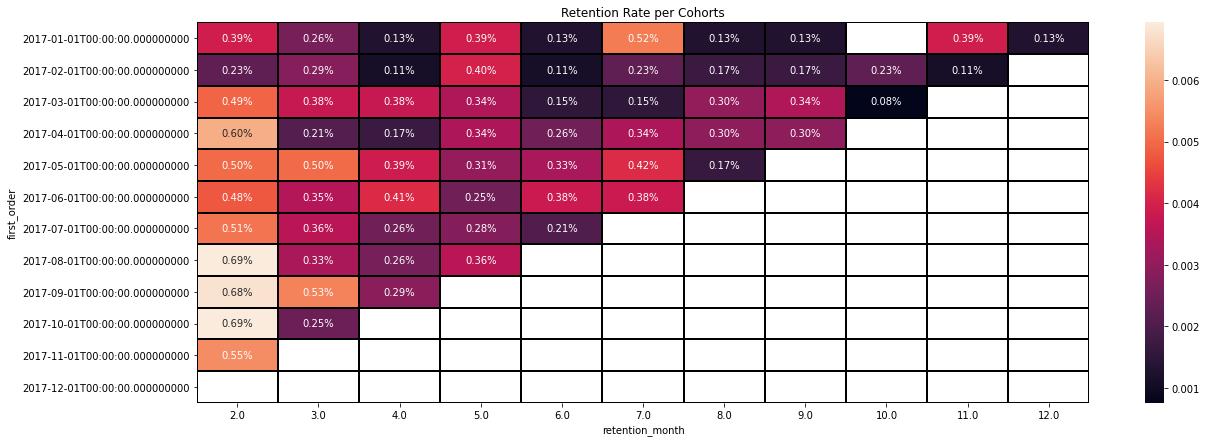

In [103]:
plt.figure(figsize=(20, 7))
plt.title('Retention Rate per Cohorts')
sns.heatmap(retention_pivot.iloc[:, 1:], annot=True, fmt='.2%', linewidths=1, linecolor='black')

In [106]:
# На графике мы видим, что в январе 2017 года одна ячейка осталась пустой, давайте проверим данные на десятый месяц.
# Данные отсутствуют, поэтому ячейка осталась пустой.

In [105]:
cohorts.query("retention_month == 10")

,first_order,cohort_diff,customer_unique_id,cohort_customers,retention,retention_month
20,2017-02-01,273 days,4,1752,0.002283,10.0
31,2017-03-01,275 days,2,2636,0.000759,10.0


In [107]:
# Судя по графику, самый высокий показатель retention rate на третий месяц был в сентябре 2017 года и составил 0.53%.
# Давайте проверим вторым способом и сверим ответ.

In [108]:
cohorts_3_month = cohorts.query("cohort_diff <= '90 days' and cohort_diff >= '60 days'") \
                            .sort_values('retention', ascending = False)

In [109]:
cohorts_3_month

,first_order,cohort_diff,customer_unique_id,cohort_customers,retention,retention_month
69,2017-09-01,61 days,22,4130,0.005327,3.0
43,2017-05-01,61 days,18,3596,0.005006,3.0
24,2017-03-01,61 days,10,2636,0.003794,3.0
58,2017-07-01,62 days,14,3894,0.003595,3.0
51,2017-06-01,61 days,11,3139,0.003504,3.0
64,2017-08-01,61 days,14,4184,0.003346,3.0
73,2017-10-01,61 days,11,4470,0.002461,3.0
34,2017-04-01,61 days,5,2352,0.002126,3.0
3,2017-01-01,90 days,1,764,0.001309,4.0
14,2017-02-01,89 days,2,1752,0.001142,4.0


In [111]:
# Действительно, самое большое количество уникальных пользователей на третий месяц вернулось в сентябре 2017, retention rate самый высокий.

In [112]:
# ОТВЕТ на ЗАДАНИЕ 5: cамый высокий retention rate в период с января по декабрь (исследовали 2017 год) для когорты 2017-09-01.

In [113]:
# ЗАДАНИЕ 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
# В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
# F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, 
# как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации 
# этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency 
# от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [114]:
# Для выполнения данного задания объединим 3 датафрейма.

In [115]:
customers_orders_items = customers_orders.merge(olist_order_items_dataset, on = 'order_id')

In [116]:
customers_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,weeks_in_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-01,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,4.43,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-01,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,4.43,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-01,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,4.43,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-01,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,4.29,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-01,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-01,4.00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [117]:
customers_orders_items.shape

(112650, 20)

In [118]:
# Сгруппируем по заказам, времени оформления, уникальным id клиентов и посчитаем сумму по каждому заказу.

In [119]:
orders_by_customer = customers_orders_items.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id']) \
                                            .agg({'price':'sum'}).reset_index()

In [120]:
orders_by_customer.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-01,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-01,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-01,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-01,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-01,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [121]:
# Проверим типы данных и переведем столбец "order_purchase_timestamp" во временной формат.

In [122]:
orders_by_customer.dtypes

order_id                            object
order_purchase_timestamp    datetime64[ns]
customer_unique_id                  object
price                              float64
dtype: object

In [123]:
orders_by_customer['order_purchase_timestamp'] = orders_by_customer['order_purchase_timestamp'].astype('datetime64[D]')

In [124]:
# Мы имеем данные за более старый период (данные из 2016, 2017, 2018 годов), поэтому смоделируем анализ и будем сравнивать даты
# оформления заказов с датой, на один день после последней покупки. Данная дата (now) будет использоваться как ориентир для
# расчета показателя "recency". 

# RFM анализ будем проводить за весь период данных (данные из 2016, 2017, 2018 годов), который имеем, не будем ограничивать.

In [149]:
now = orders_by_customer['order_purchase_timestamp'].max() + timedelta(days=1)

In [150]:
now

Timestamp('2018-09-02 00:00:00')

In [127]:
orders_by_customer['days_since_order'] = orders_by_customer['order_purchase_timestamp'].apply(lambda x: (now - x).days)

In [128]:
orders_by_customer.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-01,871766c5855e863f6eccc05f988b23cb,58.90,366
1,00018f77f2f0320c557190d7a144bdd3,2017-04-01,eb28e67c4c0b83846050ddfb8a35d051,239.90,519
2,000229ec398224ef6ca0657da4fc703e,2018-01-01,3818d81c6709e39d06b2738a8d3a2474,199.00,244
3,00024acbcdf0a6daa1e931b038114c75,2018-08-01,af861d436cfc08b2c2ddefd0ba074622,12.99,32
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-01,64b576fb70d441e8f1b2d7d446e483c5,199.90,578


In [129]:
# Посчитаем показатели recency, frequency, monetary для каждого уникального клиента:
# recency - минимальное количество дней от последней покупки до "now"
# frequency - количество заказов для каждого уникального клиента
# monetary - общая сумма, на которую каждый уникальный клиент оформил заказов

In [130]:
rfm = orders_by_customer.groupby('customer_unique_id', as_index=False) \
                        .agg({'days_since_order':'min', 'order_id':'count', 'price':'sum'}) \
                        .rename(columns={'days_since_order': 'recency', 'order_id': 'frequency', 'price': 'monetary'})

In [131]:
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,124,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,124,1,18.90
2,0000f46a3911fa3c0805444483337064,550,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,336,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,305,1,180.00


In [132]:
# Следующим шагом нам необходимо определить, на сколько групп будем разделять наши данные и каким способом будем осуществлять
# деление. Будем разбивать данные на 3 группы и будем использовать метод квантилей, так как он является более гибким, 
# так как диапазоны будут адаптироваться к данным. Каждый квинтиль будет содержать 33% клиентов.
# У нас должно получиться 27 сегментов, если будут иметься данные для каждого сегмента.

In [133]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.33, .66]).to_dict()

In [134]:
quintiles # квантили для каждого параметра

{'recency': {0.33: 154.0, 0.66: 305.0},
 'frequency': {0.33: 1.0, 0.66: 1.0},
 'monetary': {0.33: 57.99, 0.66: 125.0}}

In [135]:
# Создадим функцию для оценки "r_score". Чем меньше дней после последней покумеки, тем выше оценка (3).

In [136]:
def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 3
    elif x <= quintiles['recency'][.66]:
        return 2
    else:
        return 1

In [137]:
# Создадим функцию для оценок "fm_score". У обоих показателей одинаковая логика присвоения оценки, поэтому создадим единую
# функцию: чем больше число покупок и сумма заказов, тем выше оценка (3).

In [138]:
def fm_score(x, c):
    if x <= quintiles[c][.33]:
        return 1
    elif x <= quintiles[c][.66]:
        return 2
    else:
        return 3

In [139]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [140]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,124,1,129.90,3,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,124,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,550,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,336,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,305,1,180.00,2,1,3


In [141]:
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [142]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,124,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,124,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,550,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,336,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,305,1,180.00,2,1,3,213


In [143]:
# Сгруппируем данные по RFM_score и посмотрим, сколько уникальных клиентов включает каждый сегмент.

In [144]:
rfm_total = rfm.groupby('RFM_score', as_index=False).customer_unique_id.count()

In [145]:
rfm_total['percent'] = round((rfm_total['customer_unique_id'] * 100) / rfm_total['customer_unique_id'].sum(),2).astype(str) +' %'

In [146]:
rfm_total

,RFM_score,customer_unique_id,percent
0,111,9858,10.33 %
1,112,10044,10.53 %
2,113,9502,9.96 %
3,131,71,0.07 %
4,132,208,0.22 %
5,133,528,0.55 %
6,211,11066,11.6 %
7,212,10408,10.91 %
8,213,10532,11.04 %
9,231,62,0.06 %


In [147]:
# Визуализируем результаты для наглядности.

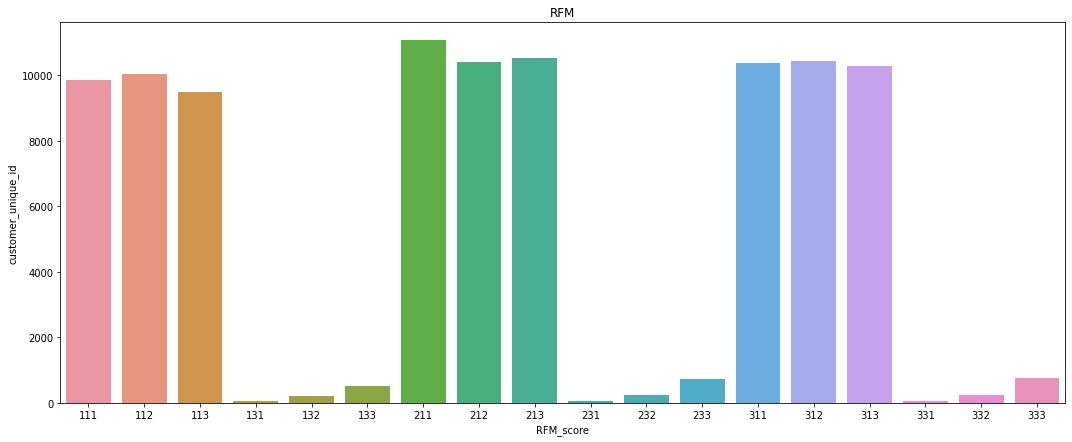

In [148]:
plt.figure(figsize=(18,7))
plt.title('RFM')
sns.barplot(data = rfm_total , x='RFM_score', y= 'customer_unique_id')

In [151]:
# Итого у нас получилось 18 категорий покупателей, давайте более детально рассмотрим каждую категорию.
# В целом можно отметить, что подавляющее количество клиентов оформляли только один заказ, "frequency" составила "1".

# 333 ("Лучшие") - совершали покупки часто, недавно и на большие суммы.
# Рекомендация: мониторить данных клиетов, выразить особую благодарность. Возможно, дополнительные скидки предлагать не стоит,
# так как и так заказы хорошо оформляют.

# 332 и 331 ("Постоянные клиенты") - покупают часто и недавно, но средний чек более низкий.
# Рекомендация: проводить маркетинговую активность, чтобы повысить средний чек (сообщать о крупных распродажах и выгодных 
# предложениях).

# 313, 312, 311 ("Новички") - большая группа клиентов, которые недавно совершили один заказ. На этот сегмент стоит обратить 
# особое внимание, попробовать увеличить количество заказов и средний чек.
# Рекомендация: предоставить полезный контент, помочь в выборе товара, поздравить с покупкой и предоставить скидку на следующий
# заказ.

# 233, 213, 133, 113 ("Денежные") - данные клиенты тратят много денег, но заказы у них либо нерегулярные, либо давно оформлялись.
# Рекомендация: изучить, что клиенты покупали. Попробовать "оживить" клиентов, предложить схожий товар, узнать, почему перестали
# покупать. 

# 232, 231, 132, 131 ("Лояльные") - регулярно заказывали в прошлом, но сумма была небольшая.
# Рекомендация: придумать программу лояльности для стимуляции денежных вложений и оформлению новых заказов.

# 111, 112, 211, 212 ("Потерянные (особенно 111)") - совершали покупки давно, редко и на небольшую сумму.
# Рекомендация: попробовать активизировать, но не фокусироваться на них, лучше сосредоточиться на сегментах с оценками 3.

In [152]:
# ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ КЛИЕНТОВ.
# Давайте более детально рассмотрим наших "Лучших" клиентов с RFM_score "333".

In [153]:
rfm.query("RFM_score == '333'").head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
410,011575986092c30523ecb71ff10cb473,154,2,182.90,3,3,3,333
434,012452d40dafae4df401bced74cdb490,124,2,427.90,3,3,3,333
444,012a218df8995d3ec3bb221828360c86,93,2,1429.80,3,3,3,333
473,013ef03e0f3f408dd9bf555e4edcdc0a,63,2,226.34,3,3,3,333
553,0178b244a5c281fb2ade54038dd4b161,63,2,208.88,3,3,3,333


In [154]:
# При работе с данными я не фильтровала по статусам заказов. Давайте выделим по 5 самых лучших клиентов по частоте заказов и 
# суммам заказов и проверим, все ли заказы были доставлены (вдруг, они все были отменены / аннулированы).

In [155]:
rfm.query("RFM_score == '333'").sort_values('frequency', ascending = False).head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
52597,8d50f5eadf50201ccdcedfb9e2ac8455,32,16,729.62,3,3,3,333
37532,6469f99c1f9dfae7733b25662e7f1782,93,7,664.20,3,3,3,333
75560,ca77025e7201e3b30c44b472ff346268,93,7,806.61,3,3,3,333
37320,63cfc61cee11cbe306bff5857d00bfe4,124,6,579.81,3,3,3,333
82305,dc813062e0fc23409cd255f7f53c7074,32,6,687.76,3,3,3,333


In [156]:
rfm.query("RFM_score == '333'").sort_values('monetary', ascending = False).head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
74752,c8460e4251689ba205045f3ea17884a1,32,4,4080.00,3,3,3,333
45973,7b0eaf68a16e4808e5388c67345033c9,124,2,2238.42,3,3,3,333
41070,6ddbc64bd04d40f7768ff088d94cbeb8,154,2,2108.00,3,3,3,333
53796,906a8a4ec9f3d4c3e64fa6d1c4fe6009,63,2,1835.00,3,3,3,333
1233,0341bbd5c969923a0f801b9e2d10a7b8,124,2,1828.44,3,3,3,333


In [157]:
top_5_frequency = customers_orders_items.query("customer_unique_id == ['8d50f5eadf50201ccdcedfb9e2ac8455', 'ca77025e7201e3b30c44b472ff346268', '6469f99c1f9dfae7733b25662e7f1782', 'dc813062e0fc23409cd255f7f53c7074', '63cfc61cee11cbe306bff5857d00bfe4']")

In [158]:
top_5_monetary = customers_orders_items.query("customer_unique_id == ['c8460e4251689ba205045f3ea17884a1', '7b0eaf68a16e4808e5388c67345033c9', '6ddbc64bd04d40f7768ff088d94cbeb8', '906a8a4ec9f3d4c3e64fa6d1c4fe6009', '0341bbd5c969923a0f801b9e2d10a7b8']")

In [159]:
top_5_monetary.groupby(['customer_unique_id', 'order_status']).order_id.count()

customer_unique_id                order_status
0341bbd5c969923a0f801b9e2d10a7b8  delivered        6
6ddbc64bd04d40f7768ff088d94cbeb8  delivered        2
7b0eaf68a16e4808e5388c67345033c9  delivered        2
906a8a4ec9f3d4c3e64fa6d1c4fe6009  delivered        7
c8460e4251689ba205045f3ea17884a1  delivered       24
Name: order_id, dtype: int64

In [160]:
top_5_frequency.groupby(['customer_unique_id', 'order_status']).order_id.count()

customer_unique_id                order_status
63cfc61cee11cbe306bff5857d00bfe4  delivered       11
6469f99c1f9dfae7733b25662e7f1782  delivered        9
8d50f5eadf50201ccdcedfb9e2ac8455  delivered       15
                                  shipped          1
ca77025e7201e3b30c44b472ff346268  delivered       12
dc813062e0fc23409cd255f7f53c7074  delivered       11
Name: order_id, dtype: int64

In [161]:
# Мы видим, что почти все заказы по 10ти клиентам были доставлены (один заказ в процессе доставки, отгружен со склада). Данные 
# клиенты подтвердли свое лидерство, можно смело приглашать в клуб любимых клиентов :)